In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states

# Census API Key
from config import census_key
c = Census(census_key, year=2013)

In [3]:
farm_markets = pd.read_csv("farmers_market.csv")

farm_markets.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [4]:
farm_markets.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/17 22:43
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/17 17:15
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,N,N,N,N,N,N,N,N,N,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/14 9:49
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/12 10:38


In [5]:
farm_markets_clean = farm_markets.drop(["FMID", "Website", "Facebook", "Twitter", "Youtube",
                                       "OtherMedia", "street", "updateTime"], axis=1)
farm_markets_clean.head()

,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,5828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,NaN,...,N,Y,Y,Y,N,N,Y,Y,N,N
1,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,NaN,06/24/2017 to 09/30/2017,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,Y,N,N,N,N,N,N
2,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,29682,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,N,N
3,10th Steet Community Farmers Market,Lamar,Barton,Missouri,64759,04/02/2014 to 11/30/2014,Wed: 3:00 PM-6:00 PM;Sat: 8:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,Y,N,N,N,N,N,N
4,112st Madison Avenue,New York,New York,New York,10029,July to November,Tue:8:00 am - 5:00 pm;Sat:8:00 am - 8:00 pm;,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,N,N


In [6]:
farm_markets_clean.columns

Index(['MarketName', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested'],
      dtype='object')

In [7]:
farm_markets_df3 = farm_markets_clean.drop_duplicates(subset=['MarketName', 'zip'], keep='first')

In [8]:
farm_markets_df3.count()

MarketName       8653
city             8613
County           8140
State            8653
zip              7725
Season1Date      5508
Season1Time      5665
Season2Date       450
Season2Time       439
Season3Date        81
Season3Time        78
Season4Date         6
Season4Time         6
x                8624
y                8624
Location         2547
Credit           8653
WIC              8653
WICcash          8653
SFMNP            8653
SNAP             8653
Organic          8653
Bakedgoods       8653
Cheese           8653
Crafts           8653
Flowers          8653
Eggs             8653
Seafood          8653
Herbs            8653
Vegetables       8653
Honey            8653
Jams             8653
Maple            8653
Meat             8653
Nursery          8653
Nuts             8653
Plants           8653
Poultry          8653
Prepared         8653
Soap             8653
Trees            8653
Wine             8653
Coffee           8653
Beans            8653
Fruits           8653
Grains    

In [9]:
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)
census_pd.head()

,B01002_001E,B01003_001E,B17001_002E,B19013_001E,B19301_001E,NAME,zip code tabulation area
0,36.6,18450.0,10816.0,12041.0,7380.0,ZCTA5 00601,00601
1,38.6,41302.0,22409.0,15663.0,8463.0,ZCTA5 00602,00602
2,38.9,53683.0,26220.0,15485.0,9176.0,ZCTA5 00603,00603
3,37.3,6591.0,3721.0,15019.0,6383.0,ZCTA5 00606,00606
4,39.2,28963.0,14569.0,16707.0,7892.0,ZCTA5 00610,00610


In [10]:
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "NAME",
                                      "zip code tabulation area": "zip"})

In [11]:
census_pd.dtypes

Median Age           float64
Population           float64
Poverty Count        float64
Household Income     float64
Per Capita Income    float64
NAME                  object
zip                   object
dtype: object

In [12]:
census_pd.columns


Index(['Median Age', 'Population', 'Poverty Count', 'Household Income',
       'Per Capita Income', 'NAME', 'zip'],
      dtype='object')

In [13]:
census_pd=census_pd.drop(columns=['NAME'])

In [14]:
census_pd.head()

,Median Age,Population,Poverty Count,Household Income,Per Capita Income,zip
0,36.6,18450.0,10816.0,12041.0,7380.0,00601
1,38.6,41302.0,22409.0,15663.0,8463.0,00602
2,38.9,53683.0,26220.0,15485.0,9176.0,00603
3,37.3,6591.0,3721.0,15019.0,6383.0,00606
4,39.2,28963.0,14569.0,16707.0,7892.0,00610


In [15]:
farm_markets_df3.columns

Index(['MarketName', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested'],
      dtype='object')

In [16]:
farm_markets_df3.head()

,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,5828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,NaN,...,N,Y,Y,Y,N,N,Y,Y,N,N
1,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,NaN,06/24/2017 to 09/30/2017,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,Y,N,N,N,N,N,N
2,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,29682,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,N,N
3,10th Steet Community Farmers Market,Lamar,Barton,Missouri,64759,04/02/2014 to 11/30/2014,Wed: 3:00 PM-6:00 PM;Sat: 8:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,Y,N,N,N,N,N,N
4,112st Madison Avenue,New York,New York,New York,10029,July to November,Tue:8:00 am - 5:00 pm;Sat:8:00 am - 8:00 pm;,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,N,N


In [17]:
updated_farm_markets=pd.merge(farm_markets_df3,census_pd,how="left", on="zip")
updated_farm_markets = pd.merge(farm_markets_df3,census_pd, how="left", left_on="zip", right_on="zip")

In [18]:
income_byzip = updated_farm_markets.groupby(["zip"])["Household Income"].mean().reset_index(name="income")
income_byzip = income_byzip.set_index("zip")
income_byzip1= income_byzip["income"]

In [19]:
income_byzip.head(5)

,income
zip,
0,NaN
10002,33218.0
10003,92540.0
10004,129313.0
10007,216037.0


In [20]:
marketcount_byzip=updated_farm_markets.groupby(["zip"])["MarketName"].count().reset_index(name="market_count")
marketcount_byzip = marketcount_byzip.set_index("zip")
marketcount1=marketcount_byzip["market_count"]

In [21]:
marketcount_byzip.head(5)

,market_count
zip,
0,1
10002,1
10003,2
10004,2
10007,3


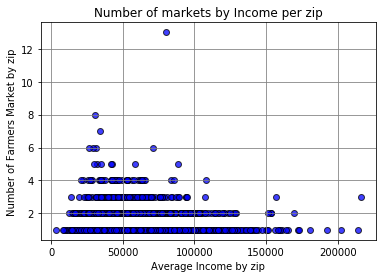

In [22]:
#plt.style.use('seaborn')
plt.scatter(income_byzip1, marketcount1, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75,label="MarketbyIncome")
# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc="best",title="City Type")

plt.title("Number of markets by Income per zip")
plt.xlabel("Average Income by zip")
plt.ylabel("Number of Farmers Market by zip")

plt.grid(b=None,which='major',axis='both',color='grey')

# Print our chart to the screen
plt.show()

In [23]:
#income_byzip = updated_farm_markets.groupby(["zip"])["Household Income"].mean().reset_index(name="income")
#income_byzip = income_byzip.set_index("zip")
#income_byzip1= income_byzip["income"]

population_byzip=updated_farm_markets.groupby(["zip"])["Population"].sum()
population_byzip_df= pd.DataFrame(population_byzip)
#population_byzip_df

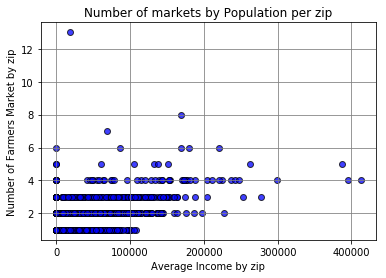

In [24]:


#plt.style.use('seaborn')
plt.scatter(population_byzip, marketcount1, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75,label="MarketbyPopulation")
# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc="best",title="City Type")

plt.title("Number of markets by Population per zip")
plt.xlabel("Average Income by zip")
plt.ylabel("Number of Farmers Market by zip")

plt.grid(b=None,which='major',axis='both',color='grey')

# Print our chart to the screen
plt.show()

In [25]:
#updated_farm_markets

In [67]:
# Create the names for the four bins
bins = [0, 60000, 150000, 500000]
group_names = ["Low Income", "Medium Income", "High Income"]

In [68]:
updated_farm_markets["Income Group"] = pd.cut(updated_farm_markets["Household Income"], bins, labels=group_names)

In [69]:
market_byincome=updated_farm_markets.groupby(["Income Group"])["MarketName"].count()
market_byincome_df= pd.DataFrame(market_byincome)

In [36]:
market_byincome=updated_farm_markets.groupby(["Income Group"])["MarketName"].count()
market_byincome_df= pd.DataFrame(market_byincome)

In [37]:
market_byincome_df

,MarketName
Income Group,
Low Income,4734
Medium Income,1872
High Income,30


In [38]:
updated_farm_markets["Organic"]
farm_markets_visual = updated_farm_markets.copy()


In [39]:
farm_markets_visual["Organic"].nunique()

3

In [40]:
farm_markets_visual["Organic"] = farm_markets_visual["Organic"].replace(r'-', 'Z', regex=True)

In [41]:
farm_markets_visual["Organic"].nunique()

3

In [42]:
farm_markets_visual["Household Income"].describe()

count      6636.000000
mean      53273.157022
std       21603.974427
min        3404.000000
25%       39299.500000
50%       48196.500000
75%       62572.500000
max      216037.000000
Name: Household Income, dtype: float64

In [51]:
bins = [0, 40000, 70000, 500000]

# Create the names for the four bins
group_names = ["Low Income", "Medium Income", "High Income"]

In [52]:
farm_markets_visual["Income Group"] = pd.cut(farm_markets_visual["Household Income"], bins, labels=group_names)
farm_markets_visual 

,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,Mushrooms,PetFood,Tofu,WildHarvested,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Income Group
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,5828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,NaN,...,Y,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
1,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,NaN,06/24/2017 to 09/30/2017,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN
2,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,29682,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,42.5,3965.0,599.0,41686.0,21726.0,Medium Income
3,10th Steet Community Farmers Market,Lamar,Barton,Missouri,64759,04/02/2014 to 11/30/2014,Wed: 3:00 PM-6:00 PM;Sat: 8:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,N,38.0,8778.0,1604.0,45781.0,21039.0,Medium Income
4,112st Madison Avenue,New York,New York,New York,10029,July to November,Tue:8:00 am - 5:00 pm;Sat:8:00 am - 8:00 pm;,NaN,NaN,NaN,...,N,N,N,N,33.5,77454.0,21062.0,31888.0,25270.0,Low Income
5,12 South Farmers Market,Nashville,Davidson,Tennessee,37204,05/05/2015 to 10/27/2015,Tue: 3:30 PM-6:30 PM;,NaN,NaN,NaN,...,Y,Y,N,N,33.2,12869.0,874.0,64267.0,40886.0,Medium Income
6,125th Street Fresh Connect Farmers' Market,New York,New York,New York,10027,06/10/2014 to 11/25/2014,Tue: 10:00 AM-7:00 PM;,NaN,NaN,NaN,...,N,N,N,N,30.7,62617.0,16581.0,37872.0,27349.0,Low Income
7,12th & Brandywine Urban Farm Market,Wilmington,New Castle,Delaware,19801,05/16/2014 to 10/17/2014,Fri: 8:00 AM-11:00 AM;,NaN,NaN,NaN,...,N,N,N,N,32.0,15656.0,4843.0,27394.0,18082.0,Low Income
8,14&U Farmers' Market,Washington,District of Columbia,District of Columbia,20009,05/03/2014 to 11/22/2014,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,N,32.9,49979.0,5248.0,88684.0,63014.0,High Income
9,14th & Kennedy Street Farmers Market,Washington,District of Columbia,District of Columbia,20011,04/09/2016 to 11/19/2016,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,Y,N,N,36.9,62569.0,9559.0,54488.0,31521.0,Medium Income


In [54]:
#market_byincome_df = pd.DataFrame(market_by_income)
#market_byincome_df

In [55]:
market_by_income_df2 = farm_markets_visual.groupby(["Income Group","Organic"])["MarketName"].count().reset_index(name="market_count")

In [56]:
market_by_income_df2

,Income Group,Organic,market_count
0,Low Income,N,335
1,Low Income,Y,406
2,Low Income,Z,1058
3,Medium Income,N,583
4,Medium Income,Y,981
5,Medium Income,Z,2128
6,High Income,N,170
7,High Income,Y,471
8,High Income,Z,504


In [62]:
market_by_income_df3=market_by_income_df2.loc[market_by_income_df2["Income Group"]=="Low Income"]
low_group=market_by_income_df3["market_count"]
#low_group

market_by_income_df4=market_by_income_df2.loc[market_by_income_df2["Income Group"]=="Medium Income"]
med_group=market_by_income_df4["market_count"]
#med_group

market_by_income_df5=market_by_income_df2.loc[market_by_income_df2["Income Group"]=="High Income"]
high_group=market_by_income_df5["market_count"]
#high_group

In [65]:
# set width of bar
barWidth = 0.25

# set height of bar
market1 = [x1 for x1 in low_group]
market2 = [x2 for x2 in med_group]
market3 = [x3 for x3 in high_group]

# Set position of bar on X axis
r1 = np.arange(len(market1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


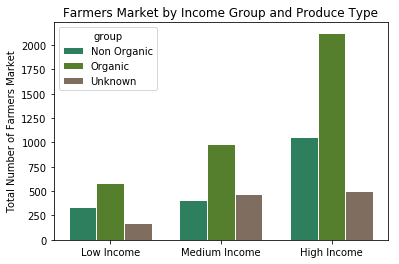

In [66]:

group = market_by_income_df2["Income Group"].unique()


#plt.legend(loc="best",title="group")
# Make the plot
plt.bar(r1, market1, color='#2d7f5e', width=barWidth, edgecolor='white', label='Non Organic')
plt.bar(r2, market2, color='#557f2d', width=barWidth, edgecolor='white', label='Organic')
plt.bar(r3, market3, color='#7f6d5f', width=barWidth, edgecolor='white', label='Unknown')

#plt.xlabel('Income group', fontweight='bold')
plt.legend(loc="best",title="group")

plt.title("Farmers Market by Income Group and Produce Type")
plt.ylabel("Total Number of Farmers Market")
plt.xticks([r + barWidth for r in range(len(market1))], ['Low Income','Medium Income', 'High Income'])
# Print our chart to the screen
plt.show()